# Parcours recherche : Aymane El Firdoussi : New algorithms

-----
## Author

This notebook was created by **Aymane El Firdoussi** 

----


In [34]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Files
%run utilities.py
%run kernels.py
%run algorithms.py

----
# Part 1: Stochastic SVGD

Ordinary SVGD performs the following updates:

$$ X^i_{n + 1} = X^i_n - \frac{\epsilon}{N} \sum_{j = 1}^{N} \nabla F(X^j_n) K(X^j_n, X^i_n) - \nabla_1 K(X^j_n, X^i_n) $$

So we can see it as a descent algorithm, performing the following updates:
$$ x_{n + 1}^i = x_n^i - \frac{\epsilon}{N} \sum_{j = 1}^N Q(x_n^j, x_n^i)$$

Hence the Stochastic version of it is, and therefore of SVGD is: 

$$ X^i_{n + 1} = X^i_n - \epsilon \left (\nabla F(X^k_n) K(X^k_n, X^i_n) - \nabla_1 K(X^k_n, X^i_n) \right)$$

The implementation of this algorithm is in the file **algorithms.py**

### $$ \mathcal{Complexity} $$
The complexity of this algorithm is : (beaucoup plus rapide !)
$$ \mathcal{O}(N T)$$

## Testing the strategy

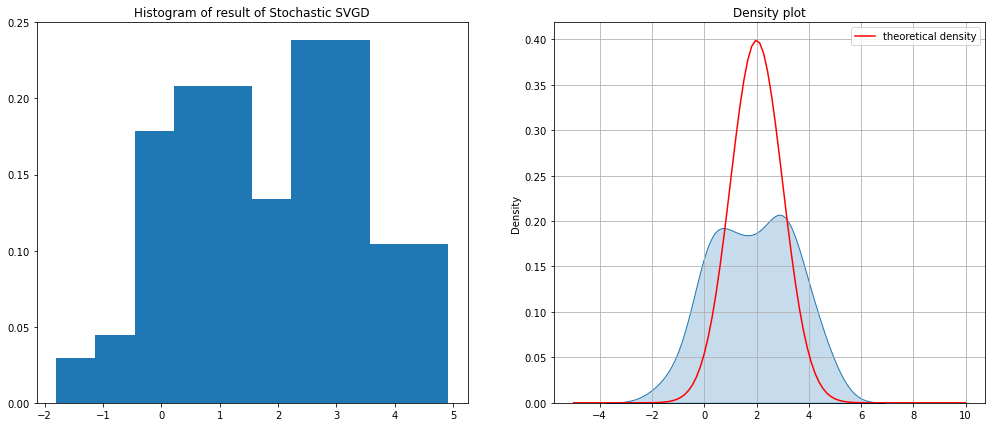

In [30]:
# Samples
X = gen_unif(100, 1, -5, 5)

# Parameters of stochastic SVGD
h = 1e-6
lam = 1
sigma = 1
T = 5000

# Performing Stochastic SVGD
Xf = SSVGD_gauss(potential_N21, X, h, lam, sigma, T)

# Plotting results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(Xf, density = True)
axs[0].set_title('Histogram of result of Stochastic SVGD')

# Plot the True density
sns.kdeplot(data = Xf, fill=True, ax=axs[1], bw_method='silverman')
x = np.linspace(-5,10,100)
y = gauss_1d(x ,2, 1)
axs[1].plot(x,y, label = 'theoretical density', c = 'r')
axs[1].set_title('Density plot')
axs[1].grid()
axs[1].legend()

# Show the plot
plt.show()


# Part 2: Adding noise to SVGD: Noisy SVGD

The algorithm of the Noisy SVGd has been implemented in the file **algorithms.py**

Let us now test it and try to simulate $ \mathcal{N}(2, 1) $

---

### $$ \mathcal{Complexity} $$

Just like ordinary SVGD $$ \mathcal{O}(N^2 T)$$

---

## Testing

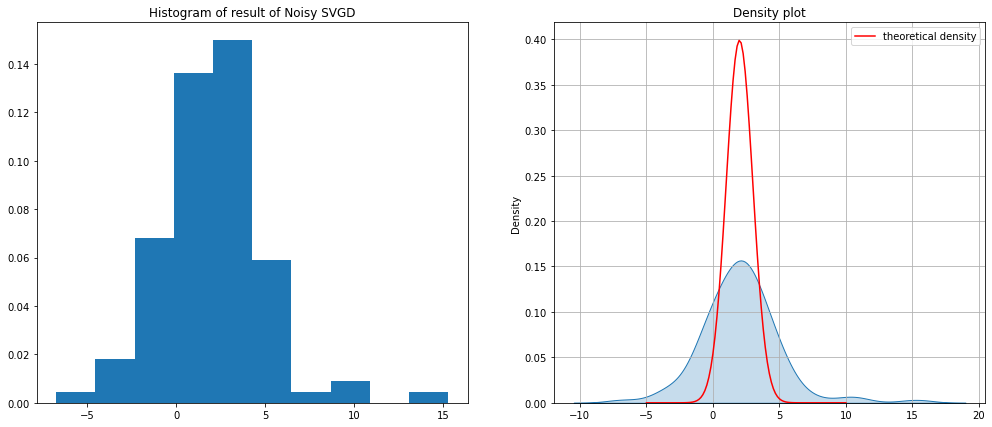

In [37]:
# Samples
X = gen_unif(100, 1, -5, 5)

# Parameters of stochastic SVGD
h = 1e-6
lam = 1
sigma = 1
T = 500

# Performing Stochastic SVGD
Xf = SVGD_noise(potential_N21, X, h, lam, sigma, T)

# Plotting results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(Xf, density = True)
axs[0].set_title('Histogram of result of Noisy SVGD')

# Plot the True density
sns.kdeplot(data = Xf, fill=True, ax=axs[1], bw_method='silverman')
x = np.linspace(-5,10,100)
y = gauss_1d(x ,2, 1)
axs[1].plot(x,y, label = 'theoretical density', c = 'r')
axs[1].set_title('Density plot')
axs[1].grid()
axs[1].legend()

# Show the plot
plt.show()


----
# Part 3: Kernelized Wasserstein Gradient Descent

- I am not sure that this algorithm does not exist, but I am sure that the SVGD version of it does not !
- Here are the details about this algorithm:

We recall the Wasserstein gradient flow :
$$ X_{n + 1} = X_n - \epsilon \nabla \log \left(\frac{\mu_n(X_n)}{\pi(X_n)}\right) $$

If we devolop it, and if we consider : $$ \pi \propto \exp(-F) $$
Then we get that the Wasserstein gradient descent algorithm is the following:

$$ X_{n + 1} = X_n - \epsilon (\nabla F(X_n) + \frac{\nabla \mu_n(X_n)}{\mu_n(X_n)}) $$

We are guaranteed that this flow converges to the target distibution $\pi$, but we do not know the density $\mu$ at each step, this is why we can propose to approximate it using kernel approximation. If we do this, we would get the following algorithm:

- Generate i.i.d samples $(X_0^i)_{1}^N \sim \mu_0$
- For n= 0, 1, ....:
    do the update : 
    
    $$ X_{n + 1}^i =  X_n^i - \epsilon \left(\nabla F(X_n^i) + \frac{\frac{1}{h} \sum_{j = 1}^N \nabla K \left(\frac{X_n^i - X_n^j}{h} \right) }{\sum_{j = 1}^N K \left( \frac{X_n^i - X_n^j}{h}\right)} \right) $$
    
    
- Let us try to implement it, and see the obtained results


In [ ]:
# Samples
X = gen_unif(100, 1, -5, 5)

# Simulation
maxit = 500
eps = 0.1
h = 1e-6
hk = 1.06 * 1 * 100**(-1/5)


# Plotting results
xf = KWGD(X, potential_N21, maxit, eps, h, hk)

# Plotting the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(xf)
axs[0].set_title('Histogram of result')

# Plot density and the theoretical one
sns.kdeplot(data = xf, fill=True, ax=axs[1], bw_method='silverman')
t = np.linspace(-5, 5, 100)
y = gauss_1d(t, 2, 1)
axs[1].plot(t, y, color="red", label="theoretical normal density")
axs[1].set_title('Density Plot')


# Show the plot
plt.show()

In [ ]:
# results of estimation
print("The empirical mean is : ", empirical_mean(xf))
print("The empirical variance is : ", empirical_variance(xf))

# PART 4: Mixing

# PART 5: Another contribution: Stochastic Wasserstein Gradient descent